# InstructPix2Pix

## Change the runtime to GPU and install all the dependencies.

In [1]:
!pip install diffusers > /dev/null
!pip install transformers > /dev/null
!pip install accelerate > /dev/null

## Import all the installed required libraries and load the models. 

In [2]:
import requests
import torch
import PIL
from PIL import ImageOps
from IPython.display import display
from diffusers import StableDiffusionInstructPix2PixPipeline
from google.colab import files

model_id = "timbrooks/instruct-pix2pix"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")

/usr/local/lib/python3.9/dist-packages/flax/core/frozen_dict.py:169: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


Demo: Make the mountain snowy.

  0%|          | 0/20 [00:00<?, ?it/s]

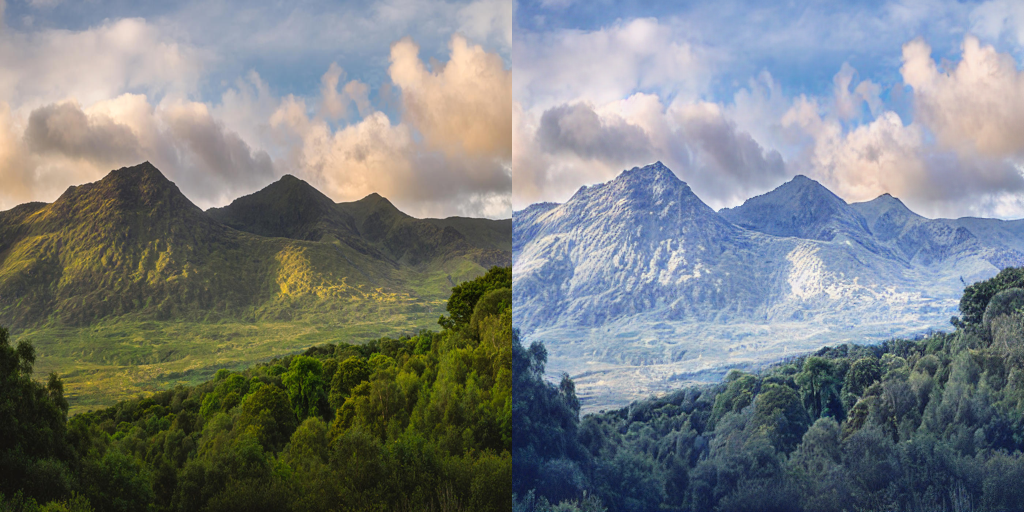

In [3]:
url = "https://huggingface.co/datasets/diffusers/diffusers-images-docs/resolve/main/mountain.png"

def download_image(url):
    image = PIL.Image.open(requests.get(url, stream=True).raw)
    image = PIL.ImageOps.exif_transpose(image)
    image = image.convert("RGB")
    return image

# Download the image
image = download_image(url)

# Define the prompt
prompt = "make the mountains snowy"

# Process the image with the prompt using the pipeline
images = pipe(prompt, image=image, num_inference_steps=20, image_guidance_scale=1.5, guidance_scale=7).images

# Display the original and processed images side by side
new_image = PIL.Image.new("RGB", (image.width * 2, image.height))
new_image.paste(image, (0, 0))
new_image.paste(images[0], (image.width, 0))
display(new_image)

## Upload the image that you want to edit using the InstuctPix2Pix model. 

In [4]:
# Upload image
uploaded_file = files.upload()

# Load image from uploaded file
filename = list(uploaded_file.keys())[0]
filename = filename.replace("\x00", "")  # Remove null bytes from filename
image = PIL.Image.open(filename)
image = image.convert("RGB")

Saving child.png to child.png


## Enter the desired prompt. Example: Change the tuxedo color to blue.

In [8]:
# Prompt user for input
prompt = input("Enter a prompt: ")

# Process image with prompt using the pipeline
images = pipe(prompt, image=image, num_inference_steps=100, image_guidance_scale=1.5, guidance_scale=8).images
images[0].save("output.png")

Enter a prompt: Make him wear a hat


  0%|          | 0/100 [00:00<?, ?it/s]

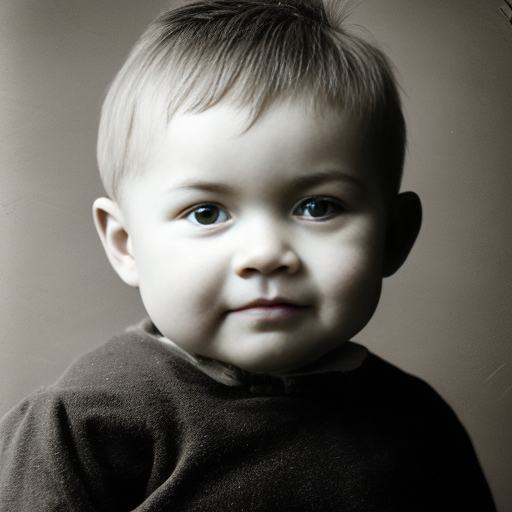

In [9]:
image

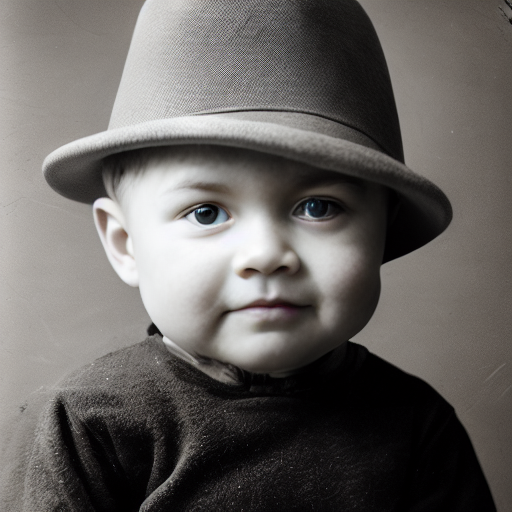

In [10]:
images[0]